In [ ]:
# basic libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pre processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Applying machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Applying tensorflow
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense

# Performance Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

# warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load the dataset
df = pd.read_csv("/content/food_quality_binary_training.csv")

In [ ]:
df.head()

Label     S1     S2     S3     S4     S5     S6    S7
0      1   4.54   1.85   2.26   1.39  63.81   4.78  83.5
1      1   4.67   1.98   2.30   1.58  62.53   5.00  82.2
2      0  19.45  26.82  22.83  30.35   2.11  13.34  56.5
3      1   5.35   2.38   2.47   3.39  35.16   4.23  73.8
4      0  24.40   8.91   7.65  10.38   6.86  16.63  69.6

In [ ]:
df.describe()

Label          S1          S2  ...          S5          S6          S7
count  980.000000  980.000000  980.000000  ...  980.000000  980.000000  980.000000
mean     0.515306   14.418765    8.825173  ...   30.292663   10.397602   72.829184
std      0.500021    9.155148   10.339301  ...   25.514552    5.383914    7.791388
min      0.000000    4.420000    1.740000  ...    2.060000    4.170000   55.100000
25%      0.000000    4.860000    2.030000  ...    7.952500    4.800000   70.800000
50%      1.000000   16.725000    6.770000  ...   15.020000   12.620000   73.150000
75%      1.000000   23.390000    8.910000  ...   61.900000   15.690000   77.700000
max      1.000000   27.550000   42.560000  ...  100.520000   17.120000   83.500000

[8 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   980 non-null    int64  
 1   S1      980 non-null    float64
 2   S2      980 non-null    float64
 3   S3      980 non-null    float64
 4   S4      980 non-null    float64
 5   S5      980 non-null    float64
 6   S6      980 non-null    float64
 7   S7      980 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 61.4 KB


In [ ]:
# Correlation Matrix
corr_mat = df.corr()
corr_mat

Label        S1        S2  ...        S5        S6        S7
Label  1.000000 -0.954406 -0.552979  ...  0.851227 -0.945883  0.723946
S1    -0.954406  1.000000  0.548805  ... -0.907732  0.993156 -0.727675
S2    -0.552979  0.548805  1.000000  ... -0.635574  0.515233 -0.904842
S3    -0.623318  0.591100  0.978063  ... -0.616156  0.550843 -0.905004
S4    -0.549547  0.519912  0.983728  ... -0.574280  0.480305 -0.902101
S5     0.851227 -0.907732 -0.635574  ...  1.000000 -0.908261  0.817096
S6    -0.945883  0.993156  0.515233  ... -0.908261  1.000000 -0.692201
S7     0.723946 -0.727675 -0.904842  ...  0.817096 -0.692201  1.000000

[8 rows x 8 columns]

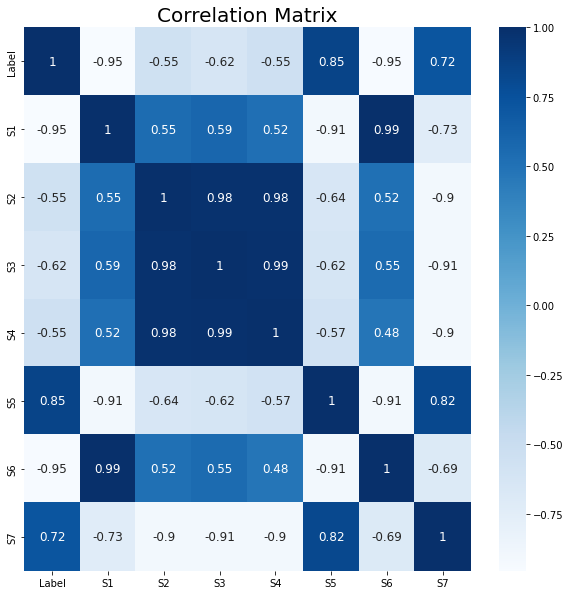

In [ ]:
#plotting correlation matrix
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix",fontsize=20)
sns.heatmap(corr_mat,annot= True,cmap="Blues",annot_kws={'size':12})
plt.show()

In [ ]:
# since no missing values we can go ahead with the train test split of the dataset
X = df.drop('Label',axis=1)
y = df[["Label"]]

In [ ]:
X.head()

S1     S2     S3     S4     S5     S6    S7
0   4.54   1.85   2.26   1.39  63.81   4.78  83.5
1   4.67   1.98   2.30   1.58  62.53   5.00  82.2
2  19.45  26.82  22.83  30.35   2.11  13.34  56.5
3   5.35   2.38   2.47   3.39  35.16   4.23  73.8
4  24.40   8.91   7.65  10.38   6.86  16.63  69.6

In [ ]:
y.head()

Label
0      1
1      1
2      0
3      1
4      0

In [ ]:
len(df)

980

In [ ]:
# Scaling the data
scale=StandardScaler()
scale.fit(X)
D=scale.transform(X)

In [ ]:
# Spliting the data test and train 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 42)

In [ ]:
X_train.shape

(784, 7)

In [ ]:
X_test.shape

(196, 7)

In [ ]:
y_train.shape

(784, 1)

In [ ]:
X_train.head()

S1    S2    S3    S4     S5     S6    S7
481   4.88  2.11  2.42  3.36  53.21   4.33  75.2
974   4.54  1.85  2.29  1.40  61.90   4.82  82.0
667  18.95  6.97  5.05  4.43  16.34  13.13  72.9
589   5.35  2.35  2.47  3.33  39.01   4.25  73.9
33    6.33  8.98  2.51  3.76  16.79   6.23  73.6

In [ ]:
X_test.head()

S1    S2    S3     S4     S5     S6    S7
788   4.50  1.81  2.24   1.40  64.47   4.78  82.7
440   5.06  2.27  2.44   3.16  47.60   4.25  74.8
139  22.24  7.02  6.14   6.61  10.37  15.31  72.5
695  25.23  9.05  8.44  13.74   5.86  15.95  63.1
66   21.93  6.72  6.09   6.23  11.01  15.43  72.3

In [ ]:
len(X_train)

784

#***Logistic Regression***

In [ ]:
# Applying Logistic Regression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_LR = LR.predict(X_test)

In [ ]:
y_LR

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
# Accuracy Score
acc_LR = accuracy_score(y_test,y_LR)
acc_LR

0.9948979591836735

In [ ]:
# Confusion Matrix
cf_LR = confusion_matrix(y_test,y_LR)
cf_LR

array([[96,  0],
       [ 1, 99]])

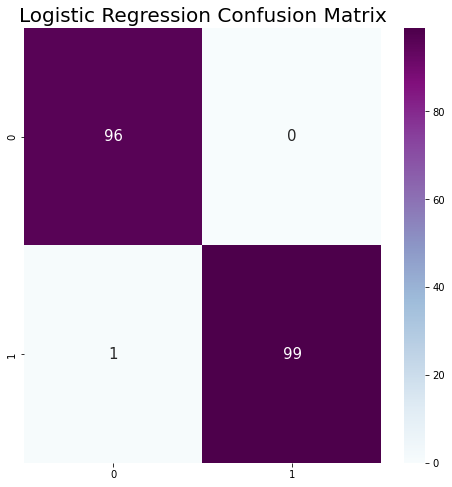

In [ ]:
#Plotting Confusion Mtrix Heatmap
plt.figure(figsize=(8,8))
plt.title("Logistic Regression Confusion Matrix",fontsize=20)
sns.heatmap(cf_LR,annot=True,cmap="BuPu",annot_kws={'size':15})
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test,y_LR))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      0.99       100

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196



# ***Decision Tree***

In [ ]:
# Applying Decision Tree Algorithm
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_DT = DT.predict(X_test)

In [ ]:
# Accuracy Score 
acc_DT = accuracy_score(y_test,y_DT)
acc_DT*100

100.0

In [ ]:
# Confusion Matrix 
cf_DT = confusion_matrix(y_test,y_DT)
cf_DT

array([[ 96,   0],
       [  0, 100]])

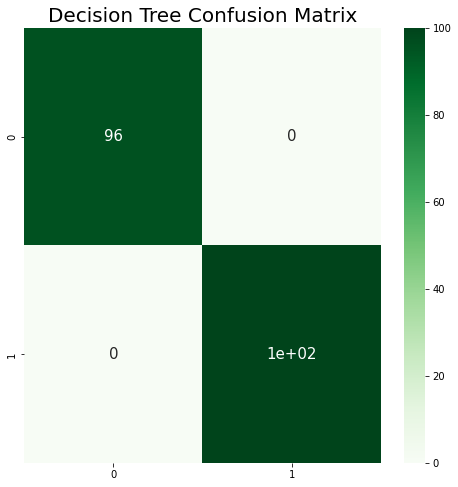

In [ ]:
# Heatmap for Confusion matrix
plt.figure(figsize=(8,8))
plt.title("Decision Tree Confusion Matrix",fontsize=20)
sns.heatmap(cf_DT,annot=True,cmap="Greens",annot_kws={'size': 15})
plt.show()

In [ ]:
# Clasification Report 
print(classification_report(y_test,y_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       100

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



# ***Random Forest***

In [ ]:
RF = RandomForestClassifier(n_estimators=500)

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_RF = RF.predict(X_test)

In [ ]:
RF.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=142507226),
 DecisionTreeClassifier(max_features='auto', random_state=1495979367),
 DecisionTreeClassifier(max_features='auto', random_state=1639912625),
 DecisionTreeClassifier(max_features='auto', random_state=1635163471),
 DecisionTreeClassifier(max_features='auto', random_state=820273830),
 DecisionTreeClassifier(max_features='auto', random_state=498782523),
 DecisionTreeClassifier(max_features='auto', random_state=1702989110),
 DecisionTreeClassifier(max_features='auto', random_state=2082836949),
 DecisionTreeClassifier(max_features='auto', random_state=1594551705),
 DecisionTreeClassifier(max_features='auto', random_state=1813602282),
 DecisionTreeClassifier(max_features='auto', random_state=2040447253),
 DecisionTreeClassifier(max_features='auto', random_state=1118881640),
 DecisionTreeClassifier(max_features='auto', random_state=1614338104),
 DecisionTreeClassifier(max_features='auto', random_state=1469703021),
 Decision

In [ ]:
# Visualisation of tree in Random forest

fn=['S1','S2','S3','S4','S5','S6','S7']
cn=['Fresh','Spoiled']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=3000)
tree.plot_tree(RF.estimators_[0],
               feature_names = fn,
               class_names = cn,
               filled = True);
fig.savefig('imagename.png')


In [ ]:
# Estimators of Random Forest
fn=['S1','S2','S3','S4','S5','S6','S7']
cn=['Fresh','Spoiled']

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(RF.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
# Accuracy Score
acc_RF = accuracy_score(y_test,y_RF)
acc_RF*100

100.0

In [ ]:
# Confusion Matrix 
cf_RF = confusion_matrix(y_test,y_RF)
cf_RF

array([[ 96,   0],
       [  0, 100]])

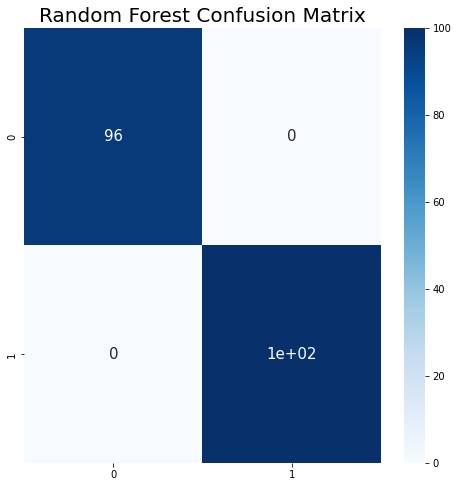

In [ ]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(8,8))
plt.title("Random Forest Confusion Matrix",fontsize=20)
sns.heatmap(cf_RF,annot=True,cmap="Blues",annot_kws={'size': 15})
plt.show()

#***TensorFlow***

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
len(X_test)

196

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation="relu", input_dim=len(X_train.columns)))
model.add(Dense(units = 64,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy",optimizer="sgd",metrics="accuracy")

In [ ]:
# fit the model
model.fit(X_train,y_train, epochs = 100,batch_size=32)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.8980
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9732
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9694
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9796
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9719
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9719
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9719
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9821
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9809
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9796
Epoch 11/

In [ ]:
y_hat = model.predict(X_test)
y_hat


array([[9.99998450e-01],
       [9.99942005e-01],
       [1.76343322e-03],
       [5.21188304e-05],
       [2.44244933e-03],
       [9.99998510e-01],
       [2.99692154e-04],
       [9.94375732e-05],
       [9.99997854e-01],
       [4.89681959e-04],
       [9.99643922e-01],
       [4.35650349e-04],
       [9.99681950e-01],
       [1.75869282e-05],
       [9.99998569e-01],
       [9.99945998e-01],
       [2.43568420e-03],
       [9.98437703e-01],
       [1.38410926e-03],
       [9.99998331e-01],
       [9.99216974e-01],
       [9.99997735e-01],
       [9.99850035e-01],
       [1.03586912e-03],
       [1.17018635e-05],
       [9.99996901e-01],
       [5.23027629e-05],
       [9.99995589e-01],
       [1.03990278e-04],
       [5.37335873e-04],
       [1.78287387e-01],
       [1.68183446e-03],
       [6.15224242e-03],
       [9.99997735e-01],
       [9.99997675e-01],
       [9.99997795e-01],
       [9.38686717e-05],
       [9.48247910e-01],
       [5.54472208e-03],
       [9.01846051e-01],


In [ ]:
y_hat = [0 if val <0.5 else 1 for val in y_hat]

In [ ]:
acc_score = accuracy_score(y_hat,y_test)
acc_score

0.9948979591836735

In [ ]:
cf_Se = confusion_matrix(y_test,y_hat)
cf_Se

array([[96,  0],
       [ 1, 99]])

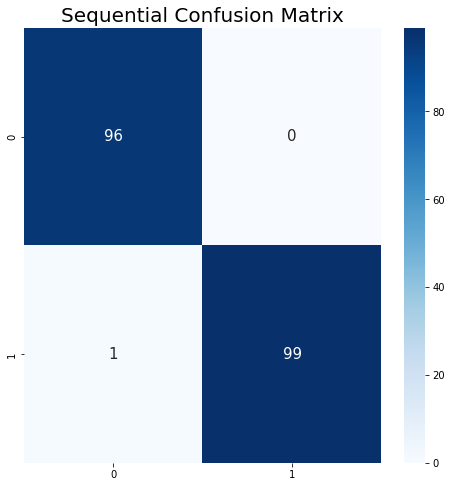

In [ ]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(8,8))
plt.title("Sequential Confusion Matrix",fontsize=20)
sns.heatmap(cf_Se,annot=True,cmap="Blues",annot_kws={'size': 15})
plt.show()

In [ ]:
claasfication = classification_report(y_hat,y_test)
print(claasfication)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        99

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196



In [ ]:
import os
 

In [ ]:
TF_MODEL_NAME = "tf_model_food_quality.h5"
model.save(TF_MODEL_NAME)
file_size = os.stat('tf_model_food_quality.h5')
print("Size of file :", file_size.st_size, "bytes")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100)

Size of file : 28832 bytes
7/7 - 0s - loss: 0.0139 - accuracy: 0.9949 - 197ms/epoch - 28ms/step

Test accuracy: 99.48979616165161


# ***TensorFlow Lite***

In [ ]:
# Converting TensorFlow model into TensorFlow Lite
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
file_size = os.stat('tf_lite_model.tflite')
print("Size of file :", file_size.st_size, "bytes")

INFO:tensorflow:Assets written to: /tmp/tmpgrvw_507/assets


Size of file : 11536 bytes


In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [1 7]
Input Type: <class 'numpy.float32'>
Output Shape: [1 1]
Output Type: <class 'numpy.float32'>


In [ ]:
X_test.shape

(196, 7)

In [ ]:
# Reshaping the tensor input and output size according to test size input and output

interpreter.resize_tensor_input(input_details[0]['index'], (196, 7))
interpreter.resize_tensor_input(output_details[0]['index'], (196,1))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

test_imgs_numpy = np.array(X_test, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
acc = accuracy_score(prediction_classes, y_test)
print('Test accuracy TFLITE model :', acc*100)

Input Shape: [196   7]
Input Type: <class 'numpy.float32'>
Output Shape: [196   1]
Output Type: <class 'numpy.float32'>
Prediction results shape: (196, 1)
Test accuracy TFLITE model : 48.97959183673469


# ***ROC Curve Plotting***

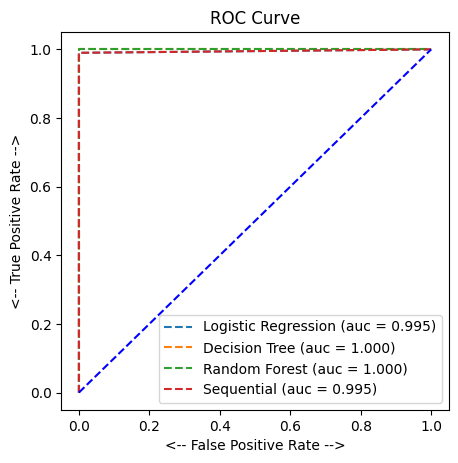

In [ ]:


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Calculating the AUC for all model (TPR- True Positive Rate, FPR- False Positive Rate)

# Logistic Regression
LR_fpr, LR_tpr, threshold = roc_curve(y_test,y_LR)
auc_LR = auc(LR_fpr, LR_tpr)


# Decision Tree
DT_fpr, DT_tpr, threshold = roc_curve(y_test,y_DT)
auc_DT = auc(DT_fpr, DT_tpr)


# Random Forest
RF_fpr, RF_tpr, threshold = roc_curve(y_test,y_RF)
auc_RF = auc(RF_fpr, RF_tpr)



# Sequential
Se_fpr, Se_tpr, threshold = roc_curve(y_test,y_hat)
auc_Se = auc(Se_fpr, Se_tpr)


# Plotting the ROC Curve
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(LR_fpr, LR_tpr, linestyle='--', label='Logistic Regression (auc = %0.3f)' % auc_LR)
plt.plot(DT_fpr, DT_tpr, linestyle='--', label='Decision Tree (auc = %0.3f)' % auc_DT)
plt.plot(RF_fpr, RF_tpr, linestyle='--', label='Random Forest (auc = %0.3f)' % auc_RF)
plt.plot(Se_fpr, Se_tpr, linestyle='--', label='Sequential (auc = %0.3f)' % auc_Se)

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC Curve')

plt.xlabel('<-- False Positive Rate -->')
plt.ylabel('<-- True Positive Rate -->')

plt.legend()

plt.show()


# ***Testing Dataset***

In [ ]:
df_test = pd.read_csv("/content/food_quality_binary_test.csv")

In [ ]:
y_real = model.predict(df_test)

In [ ]:
y_real

array([[9.99998093e-01],
       [9.99997616e-01],
       [9.99998331e-01],
       [9.99997556e-01],
       [5.49949364e-05],
       [9.99996781e-01],
       [9.99796093e-01],
       [9.98673320e-01],
       [4.90528073e-05],
       [4.77566464e-05],
       [1.36449798e-05],
       [8.14843879e-05],
       [9.99993622e-01],
       [5.74701990e-05],
       [4.24802303e-04],
       [9.99997735e-01],
       [3.43054533e-04],
       [2.29431480e-05],
       [8.46832991e-04],
       [9.99998271e-01],
       [9.99925792e-01],
       [2.11390853e-03],
       [8.72433186e-04],
       [6.33712043e-05],
       [9.99835014e-01],
       [6.89042790e-05],
       [9.99753714e-01],
       [9.99997556e-01],
       [9.99998689e-01],
       [9.99997735e-01],
       [9.99997735e-01],
       [9.99996424e-01],
       [1.33031607e-03],
       [1.32209061e-05],
       [4.99327834e-05],
       [9.99998569e-01],
       [2.26169825e-04],
       [9.99998689e-01],
       [1.80050731e-03],
       [9.99659419e-01],


In [ ]:
y_real = [0 if val <0.5 else 1 for val in y_real]
y_real

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://c6cc10a7-d8f4-48cd-ad3e-f7a38d88b97c/assets


INFO:tensorflow:Assets written to: ram://c6cc10a7-d8f4-48cd-ad3e-f7a38d88b97c/assets
